In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### SARS data

In [2]:
df = pd.read_csv('sars_2003_complete_dataset_clean.csv')
df.head()

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,Germany,1,0,0
1,2003-03-17,Canada,8,2,0
2,2003-03-17,Singapore,20,0,0
3,2003-03-17,"Hong Kong SAR, China",95,1,0
4,2003-03-17,Switzerland,2,0,0


In [39]:
df[(df.Country == 'China') & (df.Date == '2003-04-10')]

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
325,2003-04-10,China,1290,55,1025


In [52]:
# There are two rows with 2003-04-12 China, one is incorrect
df = df.drop(383).reset_index()
df.to_csv('sars_2003_complete_dataset_clean.csv', index=False)

In [14]:
cy = pd.DataFrame(df.groupby(['Country']).size(), columns=['num']).reset_index()
countries = cy[cy.num > 90].Country.values

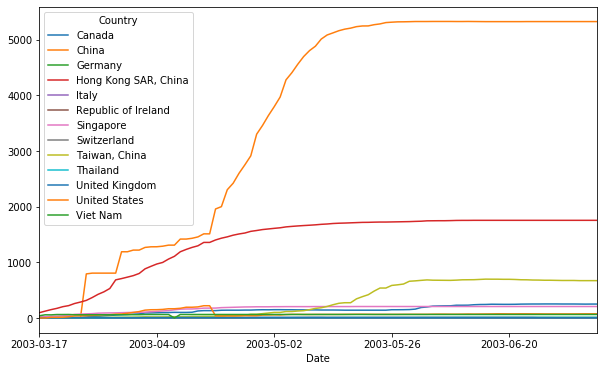

In [53]:
pd.pivot_table(df[df.Country.isin(countries)], 
               index='Date', columns='Country', 
               values='Cumulative number of case(s)').fillna(0).plot(figsize=(10,6))

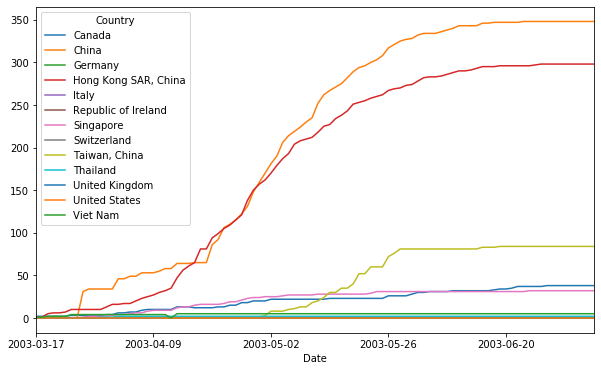

In [54]:
pd.pivot_table(df[df.Country.isin(countries)], 
               index='Date', columns='Country', 
               values='Number of deaths').fillna(0).plot(figsize=(10,6))

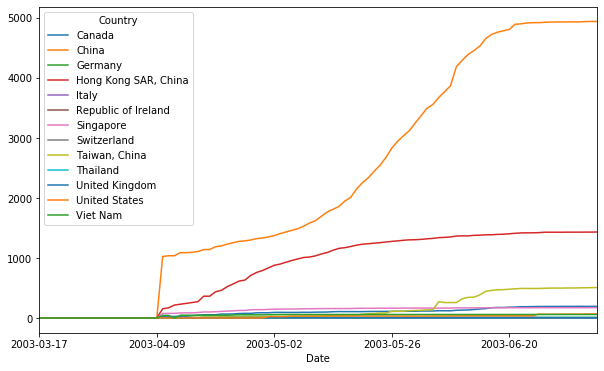

In [55]:
pd.pivot_table(df[df.Country.isin(countries)], 
               index='Date', columns='Country', 
               values='Number recovered').fillna(0).plot(figsize=(10,6))

In [65]:
china = df[df.Country == 'China'].reset_index().drop(columns='index')

In [66]:
china.to_csv('sars_2003_China_cleaned.csv', index=False)

In [77]:
china['current ill'] = china['Cumulative number of case(s)'] -\
                        china['Number of deaths'] - china['Number recovered']

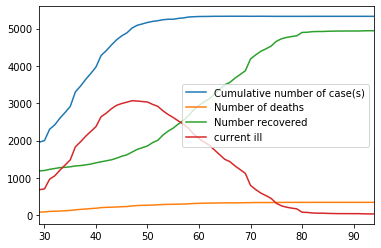

In [80]:
china[china.Date > '2003-04-19'].plot()

In [98]:
china[china.Date > '2003-04-19'].rename(
    columns={'current ill': "Currently ill"}).reset_index().drop(
    columns=['index', 'Country']).to_csv("sars_China.csv", index=False)

In [81]:
hk = df[df.Country == 'Hong Kong SAR, China'].reset_index().drop(columns='index')

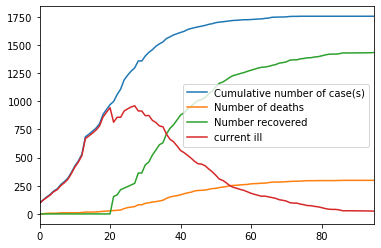

In [86]:
hk['current ill'] = hk['Cumulative number of case(s)'] -\
                    hk['Number of deaths'] - hk['Number recovered']
hk.plot()

In [101]:
hk.drop(columns=['Country']).rename(
    columns={'current ill': "Currently ill"}).to_csv('sars_HK.csv', index=False)

In [113]:
prev = 0
add = np.zeros(96)
for i in range(96):
    add[i] = hk.iloc[i]['Cumulative number of case(s)'] - prev
    prev = hk.iloc[i]['Cumulative number of case(s)']

### Stock

In [3]:
df = pd.read_csv('adjusted_djia.csv')
# df = df.sort_values('Date').reset_index().drop(columns='index')
# df.iloc[145:].to_csv('adjusted_djia.csv', index=False)

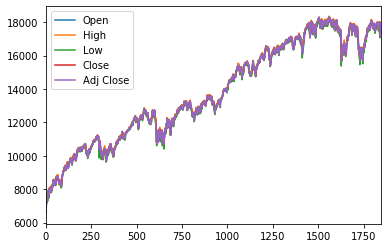

In [6]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot()

In [7]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1839,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
1840,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
1841,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
1842,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
1843,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
